In [3]:
import os

# Get the current working directory (optional)
current_directory = os.getcwd()
print(f"Current directory: {current_directory}")

# Define the new directory path
new_directory = "I:/loca2/gen_use"  # Replace with your desired path

# Change the directory
try:
    os.chdir(new_directory)
    print(f"Successfully changed directory to: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: The directory '{new_directory}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Current directory: C:\Users\Ben
Successfully changed directory to: I:\loca2\gen_use


In [13]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units if necessary (e.g., kg m-2 s-1 to mm/day)
    # Assuming original units are kg m-2 s-1 (standard CMIP)
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this line.
    if 'units' in ds_data['pr'].attrs and ds_data['pr'].attrs['units'] == 'kg m-2 s-1':
        print("Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.")
        ds_data['pr'] = ds_data['pr'] * 86400
    elif 'units' in ds_data['pr'].attrs:
        print(f"Warning: 'pr' units are '{ds_data['pr'].attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    # This logic correctly wraps around the year.
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    pr_filtered = ds_data['pr'].where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time')

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
file_path_data = "pr.ACCESS-CM2.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc" # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_ACCESS.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_ACCESS.nc' created successfully!


In [14]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.ACCESS-CM2.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc" # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_ACCESS.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_ACCESS.nc' created successfully!


In [15]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.ACCESS-CM2.ssp370.r1i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc" # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_ACCESS.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_ACCESS.nc' created successfully!


In [16]:
def process_and_save(input_file, output_file, divisor):
    """
    Loads a NetCDF file, divides the 'pr' variable by a divisor, and saves the result.

    Args:
        input_file (str): Path to the input NetCDF file.
        output_file (str): Path to save the output NetCDF file.
        divisor (float): The divisor for the 'pr' variable.
    """
    try:
        ds = xr.open_dataset(input_file)
        ds['pr'] = ds['pr'] / divisor
        ds.to_netcdf(output_file)
        print(f"Processed and saved: {output_file}")
    except FileNotFoundError:
        print(f"Error: File not found: {input_file}")
    except Exception as e:
        print(f"Error processing {input_file}: {e}")

# Process hist.nc
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_ACCESS.nc", "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_ACCESS_annual.nc", 65)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_ACCESS.nc", "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_ACCESS_annual.nc", 30)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_ACCESS.nc", "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_ACCESS_annual.nc", 30)

Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_ACCESS_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_ACCESS_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_ACCESS_annual.nc


In [17]:
def calculate_and_save_index(hist_expected_file, early_file, late_file, early_index_file, late_index_file):
    """
    Loads NetCDF files, calculates the index, and saves the result.

    Args:
        hist_expected_file (str): Path to hist_expected.nc.
        early_file (str): Path to early.nc.
        late_file (str): Path to late.nc.
        early_index_file (str): Path to save early_index.nc.
        late_index_file (str): Path to save late_index.nc.
    """
    try:
        hist_expected = xr.open_dataset(hist_expected_file)
        early = xr.open_dataset(early_file)
        late = xr.open_dataset(late_file)

        early_index = ((early['pr']) - hist_expected['pr'])# - early['pr']
        late_index = ((late['pr']) - hist_expected['pr'])# - late['pr']

        early_index_ds = xr.Dataset({'early_index': early_index})
        late_index_ds = xr.Dataset({'late_index': late_index})

        early_index_ds.to_netcdf(early_index_file)
        late_index_ds.to_netcdf(late_index_file)

        print(f"Calculated and saved: {early_index_file} and {late_index_file}")

    except FileNotFoundError:
        print("Error: One or more input files not found.")
    except Exception as e:
        print(f"Error calculating index: {e}")

# Calculate and save the index
calculate_and_save_index("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_ACCESS_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_ACCESS_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_ACCESS_annual.nc", 
                         "VCP_DROUGHT_OCTMAR_01A-1_EXCESSzerodays_2015-2044_VWD_ACCESS.nc", 
                         "VCP_DROUGHT_OCTMAR_01B-1_EXCESSzerodays_2045-2074_VWD_ACCESS.nc")

Calculated and saved: VCP_DROUGHT_OCTMAR_01A-1_EXCESSzerodays_2015-2044_VWD_ACCESS.nc and VCP_DROUGHT_OCTMAR_01B-1_EXCESSzerodays_2045-2074_VWD_ACCESS.nc


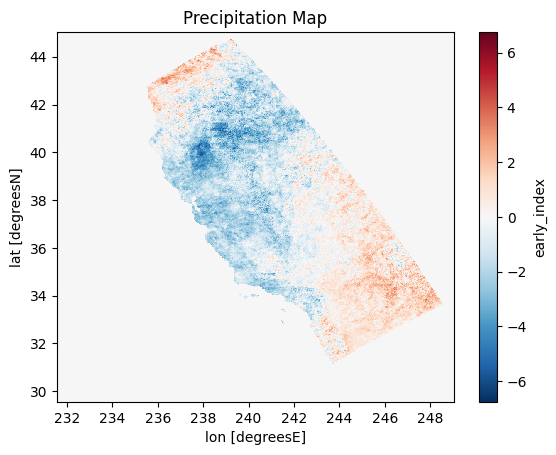

In [29]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01A-1_EXCESSzerodays_2015-2044_VWD_ACCESS.nc"  # Replace with your NetCDF file path
variable_to_map = "early_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

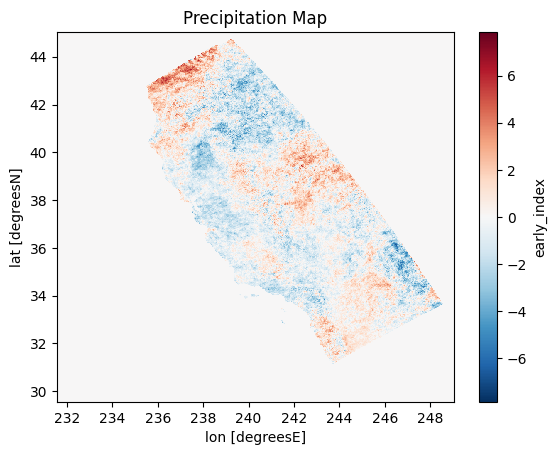

In [33]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_01A-1_EXCESSzerodays_2015-2044_VWD_ACCESS.nc"  # Replace with your NetCDF file path
variable_to_map = "early_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

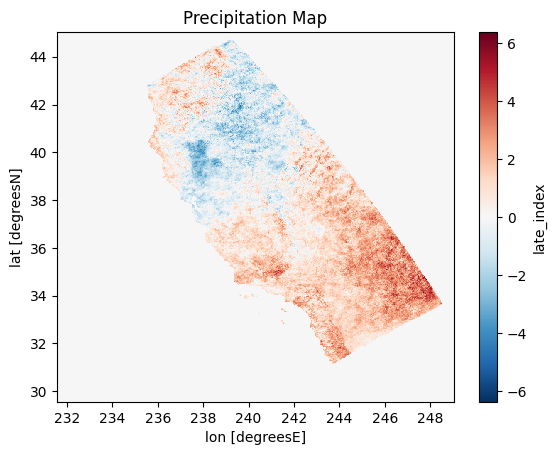

In [31]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01B-1_EXCESSzerodays_2045-2074_VWD_ACCESS.nc"  # Replace with your NetCDF file path
variable_to_map = "late_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

In [35]:
def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units if necessary (e.g., kg m-2 s-1 to mm/day)
    # Assuming original units are kg m-2 s-1 (standard CMIP)
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this line.
    if 'units' in ds_data['pr'].attrs and ds_data['pr'].attrs['units'] == 'kg m-2 s-1':
        print("Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.")
        ds_data['pr'] = ds_data['pr'] * 86400
    elif 'units' in ds_data['pr'].attrs:
        print(f"Warning: 'pr' units are '{ds_data['pr'].attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    # This logic correctly wraps around the year.
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    pr_filtered = ds_data['pr'].where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time')

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
file_path_data = "pr.EC-Earth3.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_Earth3.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_Earth3.nc' created successfully!


In [37]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.EC-Earth3.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_Earth3.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_Earth3.nc' created successfully!


In [38]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.EC-Earth3.ssp370.r1i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_Earth3.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_Earth3.nc' created successfully!


In [41]:
def process_and_save(input_file, output_file, divisor):
    """
    Loads a NetCDF file, divides the 'pr' variable by a divisor, and saves the result.

    Args:
        input_file (str): Path to the input NetCDF file.
        output_file (str): Path to save the output NetCDF file.
        divisor (float): The divisor for the 'pr' variable.
    """
    try:
        ds = xr.open_dataset(input_file)
        ds['pr'] = ds['pr'] / divisor
        ds.to_netcdf(output_file)
        print(f"Processed and saved: {output_file}")
    except FileNotFoundError:
        print(f"Error: File not found: {input_file}")
    except Exception as e:
        print(f"Error processing {input_file}: {e}")

# Process hist.nc
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_Earth3.nc", "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_Earth3_annual.nc", 65)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_Earth3.nc", "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_Earth3_annual.nc", 30)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_Earth3.nc", "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_Earth3_annual.nc", 30)

Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_Earth3_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_Earth3_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_Earth3_annual.nc


In [43]:
def calculate_and_save_index(hist_expected_file, early_file, late_file, early_index_file, late_index_file):
    """
    Loads NetCDF files, calculates the index, and saves the result.

    Args:
        hist_expected_file (str): Path to hist_expected.nc.
        early_file (str): Path to early.nc.
        late_file (str): Path to late.nc.
        early_index_file (str): Path to save early_index.nc.
        late_index_file (str): Path to save late_index.nc.
    """
    try:
        hist_expected = xr.open_dataset(hist_expected_file)
        early = xr.open_dataset(early_file)
        late = xr.open_dataset(late_file)

        early_index = ((early['pr']) - hist_expected['pr'])# - early['pr']
        late_index = ((late['pr']) - hist_expected['pr'])# - late['pr']

        early_index_ds = xr.Dataset({'early_index': early_index})
        late_index_ds = xr.Dataset({'late_index': late_index})

        early_index_ds.to_netcdf(early_index_file)
        late_index_ds.to_netcdf(late_index_file)

        print(f"Calculated and saved: {early_index_file} and {late_index_file}")

    except FileNotFoundError:
        print("Error: One or more input files not found.")
    except Exception as e:
        print(f"Error calculating index: {e}")

# Calculate and save the index
calculate_and_save_index("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_Earth3_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_Earth3_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_Earth3_annual.nc", 
                         "VCP_DROUGHT_OCTMAR_01A-2_EXCESSzerodays_2015-2044_VWD_Earth3.nc", 
                         "VCP_DROUGHT_OCTMAR_01B-2_EXCESSzerodays_2045-2074_VWD_Earth3.nc")

Calculated and saved: VCP_DROUGHT_OCTMAR_01A-2_EXCESSzerodays_2015-2044_VWD_Earth3.nc and VCP_DROUGHT_OCTMAR_01B-2_EXCESSzerodays_2045-2074_VWD_Earth3.nc


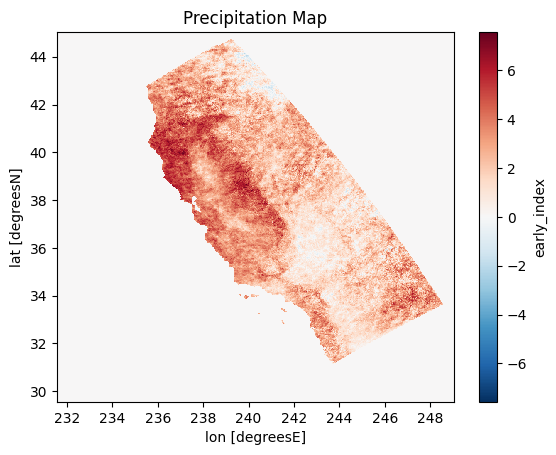

In [69]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01A-2_EXCESSzerodays_2015-2044_VWD_Earth3.nc"  # Replace with your NetCDF file path
variable_to_map = "early_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

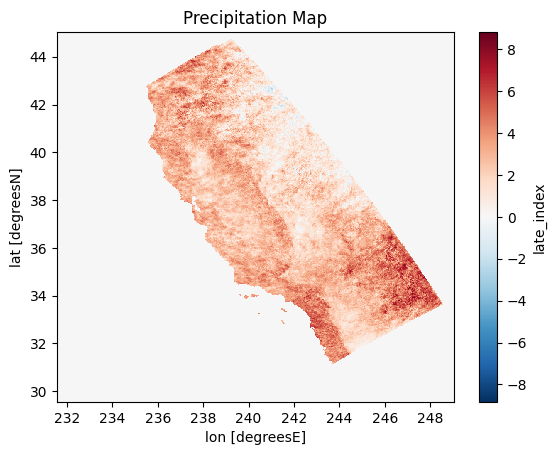

In [67]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01B-2_EXCESSzerodays_2045-2074_VWD_Earth3.nc"  # Replace with your NetCDF file path
variable_to_map = "late_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

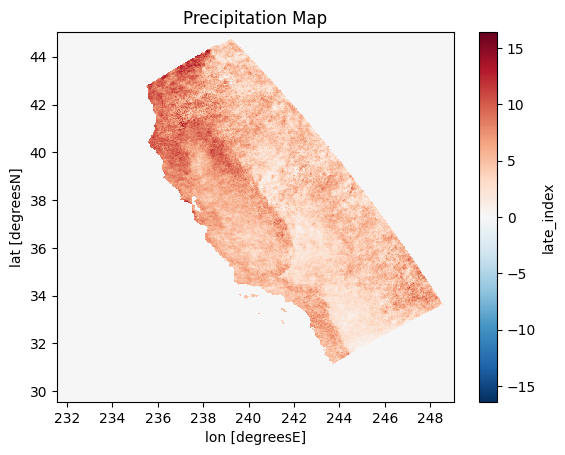

In [65]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_01B-2_EXCESSzerodays_2045-2074_VWD_Earth3.nc"  # Replace with your NetCDF file path
variable_to_map = "late_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

In [71]:
def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units if necessary (e.g., kg m-2 s-1 to mm/day)
    # Assuming original units are kg m-2 s-1 (standard CMIP)
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this line.
    if 'units' in ds_data['pr'].attrs and ds_data['pr'].attrs['units'] == 'kg m-2 s-1':
        print("Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.")
        ds_data['pr'] = ds_data['pr'] * 86400
    elif 'units' in ds_data['pr'].attrs:
        print(f"Warning: 'pr' units are '{ds_data['pr'].attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    # This logic correctly wraps around the year.
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    pr_filtered = ds_data['pr'].where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time')

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
file_path_data = "pr.FGOALS-g3.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_FGOALS.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_FGOALS.nc' created successfully!


In [77]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.FGOALS-g3.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_FGOALS.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_FGOALS.nc' created successfully!


In [78]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.FGOALS-g3.ssp370.r1i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_FGOALS.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_FGOALS.nc' created successfully!


In [81]:
def process_and_save(input_file, output_file, divisor):
    """
    Loads a NetCDF file, divides the 'pr' variable by a divisor, and saves the result.

    Args:
        input_file (str): Path to the input NetCDF file.
        output_file (str): Path to save the output NetCDF file.
        divisor (float): The divisor for the 'pr' variable.
    """
    try:
        ds = xr.open_dataset(input_file)
        ds['pr'] = ds['pr'] / divisor
        ds.to_netcdf(output_file)
        print(f"Processed and saved: {output_file}")
    except FileNotFoundError:
        print(f"Error: File not found: {input_file}")
    except Exception as e:
        print(f"Error processing {input_file}: {e}")

# Process hist.nc
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_FGOALS.nc", "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_FGOALS_annual.nc", 65)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_FGOALS.nc", "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_FGOALS_annual.nc", 30)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_FGOALS.nc", "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_FGOALS_annual.nc", 30)

Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_FGOALS_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_FGOALS_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_FGOALS_annual.nc


In [83]:
def calculate_and_save_index(hist_expected_file, early_file, late_file, early_index_file, late_index_file):
    """
    Loads NetCDF files, calculates the index, and saves the result.

    Args:
        hist_expected_file (str): Path to hist_expected.nc.
        early_file (str): Path to early.nc.
        late_file (str): Path to late.nc.
        early_index_file (str): Path to save early_index.nc.
        late_index_file (str): Path to save late_index.nc.
    """
    try:
        hist_expected = xr.open_dataset(hist_expected_file)
        early = xr.open_dataset(early_file)
        late = xr.open_dataset(late_file)

        early_index = ((early['pr']) - hist_expected['pr'])# - early['pr']
        late_index = ((late['pr']) - hist_expected['pr'])# - late['pr']

        early_index_ds = xr.Dataset({'early_index': early_index})
        late_index_ds = xr.Dataset({'late_index': late_index})

        early_index_ds.to_netcdf(early_index_file)
        late_index_ds.to_netcdf(late_index_file)

        print(f"Calculated and saved: {early_index_file} and {late_index_file}")

    except FileNotFoundError:
        print("Error: One or more input files not found.")
    except Exception as e:
        print(f"Error calculating index: {e}")

# Calculate and save the index
calculate_and_save_index("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_FGOALS_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_FGOALS_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_FGOALS_annual.nc", 
                         "VCP_DROUGHT_OCTMAR_01A-3_EXCESSzerodays_2015-2044_VWD_FGOALS.nc", 
                         "VCP_DROUGHT_OCTMAR_01B-3_EXCESSzerodays_2045-2074_VWD_FGOALS.nc")

Calculated and saved: VCP_DROUGHT_OCTMAR_01A-3_EXCESSzerodays_2015-2044_VWD_FGOALS.nc and VCP_DROUGHT_OCTMAR_01B-3_EXCESSzerodays_2045-2074_VWD_FGOALS.nc


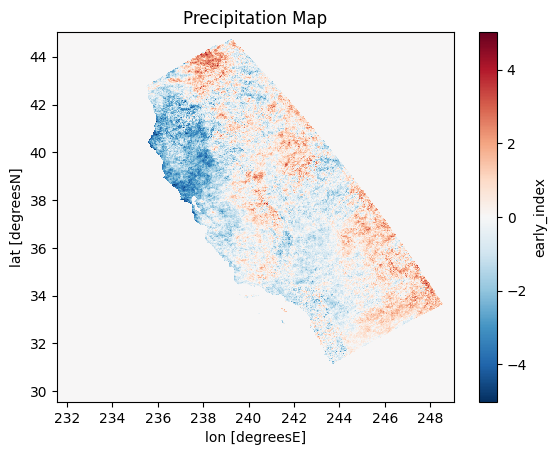

In [85]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01A-3_EXCESSzerodays_2015-2044_VWD_FGOALS.nc"  # Replace with your NetCDF file path
variable_to_map = "early_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

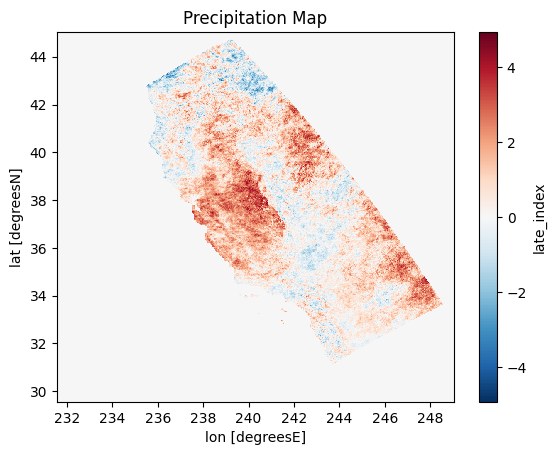

In [87]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01B-3_EXCESSzerodays_2045-2074_VWD_FGOALS.nc"  # Replace with your NetCDF file path
variable_to_map = "late_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

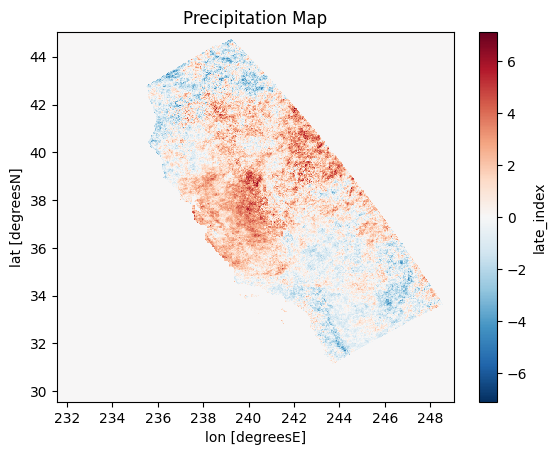

In [89]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_01B-3_EXCESSzerodays_2045-2074_VWD_FGOALS.nc"  # Replace with your NetCDF file path
variable_to_map = "late_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

In [91]:
def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units if necessary (e.g., kg m-2 s-1 to mm/day)
    # Assuming original units are kg m-2 s-1 (standard CMIP)
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this line.
    if 'units' in ds_data['pr'].attrs and ds_data['pr'].attrs['units'] == 'kg m-2 s-1':
        print("Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.")
        ds_data['pr'] = ds_data['pr'] * 86400
    elif 'units' in ds_data['pr'].attrs:
        print(f"Warning: 'pr' units are '{ds_data['pr'].attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    # This logic correctly wraps around the year.
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    pr_filtered = ds_data['pr'].where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time')

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
file_path_data = "pr.MIROC6.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MIROC.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MIROC.nc' created successfully!


In [92]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.MIROC6.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MIROC.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MIROC.nc' created successfully!


In [95]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.MIROC6.ssp370.r1i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MIROC.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MIROC.nc' created successfully!


In [97]:
def process_and_save(input_file, output_file, divisor):
    """
    Loads a NetCDF file, divides the 'pr' variable by a divisor, and saves the result.

    Args:
        input_file (str): Path to the input NetCDF file.
        output_file (str): Path to save the output NetCDF file.
        divisor (float): The divisor for the 'pr' variable.
    """
    try:
        ds = xr.open_dataset(input_file)
        ds['pr'] = ds['pr'] / divisor
        ds.to_netcdf(output_file)
        print(f"Processed and saved: {output_file}")
    except FileNotFoundError:
        print(f"Error: File not found: {input_file}")
    except Exception as e:
        print(f"Error processing {input_file}: {e}")

# Process hist.nc
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MIROC.nc", "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MIROC_annual.nc", 65)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MIROC.nc", "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MIROC_annual.nc", 30)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MIROC.nc", "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MIROC_annual.nc", 30)

Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MIROC_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MIROC_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MIROC_annual.nc


In [99]:
def calculate_and_save_index(hist_expected_file, early_file, late_file, early_index_file, late_index_file):
    """
    Loads NetCDF files, calculates the index, and saves the result.

    Args:
        hist_expected_file (str): Path to hist_expected.nc.
        early_file (str): Path to early.nc.
        late_file (str): Path to late.nc.
        early_index_file (str): Path to save early_index.nc.
        late_index_file (str): Path to save late_index.nc.
    """
    try:
        hist_expected = xr.open_dataset(hist_expected_file)
        early = xr.open_dataset(early_file)
        late = xr.open_dataset(late_file)

        early_index = ((early['pr']) - hist_expected['pr'])# - early['pr']
        late_index = ((late['pr']) - hist_expected['pr'])# - late['pr']

        early_index_ds = xr.Dataset({'early_index': early_index})
        late_index_ds = xr.Dataset({'late_index': late_index})

        early_index_ds.to_netcdf(early_index_file)
        late_index_ds.to_netcdf(late_index_file)

        print(f"Calculated and saved: {early_index_file} and {late_index_file}")

    except FileNotFoundError:
        print("Error: One or more input files not found.")
    except Exception as e:
        print(f"Error calculating index: {e}")

# Calculate and save the index
calculate_and_save_index("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MIROC_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MIROC_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MIROC_annual.nc", 
                         "VCP_DROUGHT_OCTMAR_01A-4_EXCESSzerodays_2015-2044_VWD_MIROC.nc", 
                         "VCP_DROUGHT_OCTMAR_01B-4_EXCESSzerodays_2045-2074_VWD_MIROC.nc")

Calculated and saved: VCP_DROUGHT_OCTMAR_01A-4_EXCESSzerodays_2015-2044_VWD_MIROC.nc and VCP_DROUGHT_OCTMAR_01B-4_EXCESSzerodays_2045-2074_VWD_MIROC.nc


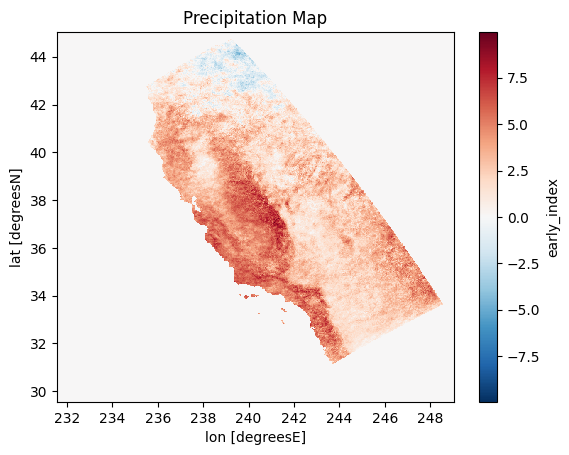

In [101]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01A-4_EXCESSzerodays_2015-2044_VWD_MIROC.nc"  # Replace with your NetCDF file path
variable_to_map = "early_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

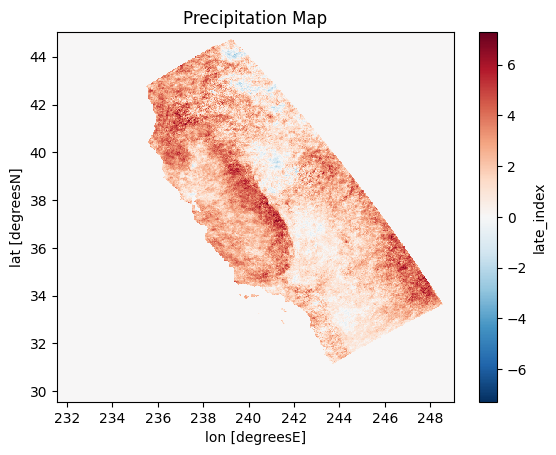

In [105]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01B-4_EXCESSzerodays_2045-2074_VWD_MIROC.nc"  # Replace with your NetCDF file path
variable_to_map = "late_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

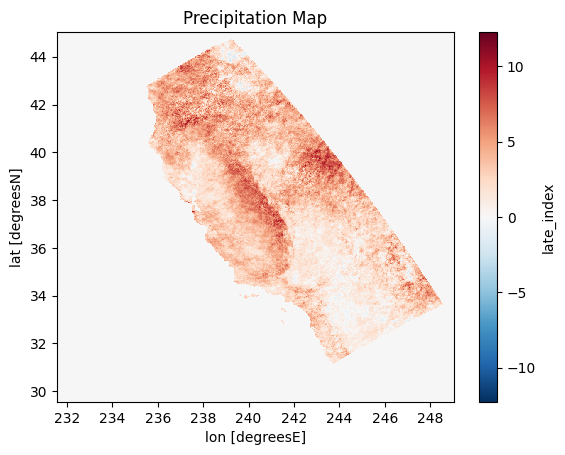

In [107]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_01B-4_EXCESSzerodays_2045-2074_VWD_MIROC.nc"  # Replace with your NetCDF file path
variable_to_map = "late_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

In [109]:
def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units if necessary (e.g., kg m-2 s-1 to mm/day)
    # Assuming original units are kg m-2 s-1 (standard CMIP)
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this line.
    if 'units' in ds_data['pr'].attrs and ds_data['pr'].attrs['units'] == 'kg m-2 s-1':
        print("Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.")
        ds_data['pr'] = ds_data['pr'] * 86400
    elif 'units' in ds_data['pr'].attrs:
        print(f"Warning: 'pr' units are '{ds_data['pr'].attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    # This logic correctly wraps around the year.
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    pr_filtered = ds_data['pr'].where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time')

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
file_path_data = "pr.MPI-ESM1-2-HR.historical.r3i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MPI.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MPI.nc' created successfully!


In [110]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.MPI-ESM1-2-HR.ssp370.r3i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MPI.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MPI.nc' created successfully!


In [112]:
import xarray as xr
# import dask.array as da # Dask is implicitly used by xarray when chunks are specified

def count_zero_precip_days_oct_mar(file_path_data):
    """
    Counts the number of days where daily precip is zero,
    specifically for the months of October through March.
    Optimized with Dask for lazy loading and parallel computation.

    Args:
        file_path_data (str): Path to the NetCDF file containing daily pr.

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                          the count of zero precipitation days. Returns None if there's an error.
    """
    try:
        # Enable Dask and let it chunk automatically along time
        ds_data = xr.open_dataset(file_path_data, chunks={'time': 'auto'})

    except FileNotFoundError:
        print(f"Error: File not found at {file_path_data}")
        return None
    except Exception as e:
        print(f"Error opening dataset: {e}")
        return None

    # Ensure 'pr' is the precipitation variable name in your NetCDF file
    if 'pr' not in ds_data.variables:
        print(f"Error: Precipitation variable 'pr' not found in the dataset.")
        print(f"Available variables: {list(ds_data.variables)}")
        return None

    # Convert units: kg m-2 s-1 to mm/day
    # 1 kg m-2 s-1 = 86400 mm/day
    # If your data is already in mm/day, you can skip or comment out this section.
    # It's good practice to check units if possible.
    pr_data = ds_data['pr']
    if 'units' in pr_data.attrs and pr_data.attrs['units'].lower() == 'kg m-2 s-1':
        print(f"Original 'pr' units detected as '{pr_data.attrs['units']}'. Converting to mm/day.")
        pr_data = pr_data * 86400
        pr_data.attrs['units'] = 'mm/day' # Update units attribute
    elif 'units' in pr_data.attrs:
        print(f"Warning: 'pr' units are '{pr_data.attrs['units']}'. Assuming they are equivalent to mm/day for zero check, or already in mm/day.")
    else:
        print("Warning: 'pr' units attribute not found. Assuming data is in mm/day or comparable for zero check.")


    # --- Filter for October to March ---
    # Create a boolean mask for the desired months
    # (time.dt.month >= 10) OR (time.dt.month <= 3)
    month_filter = (ds_data.time.dt.month >= 10) | (ds_data.time.dt.month <= 3)
    
    # Apply the filter to the precipitation data
    # We use the (potentially unit-converted) pr_data here
    pr_filtered = pr_data.where(month_filter, drop=True)
    
    # --- End of filter ---

    # Compare daily filtered pr with zero.
    # Using a small threshold to account for potential floating point inaccuracies if needed,
    # but for strict zero, <= 0 is fine.
    zero_precip_days = pr_filtered <= 0  # Or use a small epsilon like pr_filtered < 0.001 if exact zeros are rare

    # Count the number of zero precipitation days at each location
    # Sum over the 'time' dimension for the filtered data
    zero_precip_counts = zero_precip_days.sum(dim='time', dtype='int') # Specify dtype for counts

    # Compute the result (trigger Dask computation)
    print("Computing zero precipitation day counts for Oct-Mar...")
    computed_counts = zero_precip_counts.compute()
    print("Computation complete.")

    return computed_counts

# --- Main execution ---
# Note: The filename for the data has been updated in your example
file_path_data = "pr.MPI-ESM1-2-HR.ssp370.r3i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your daily data file

zero_day_counts_oct_mar = count_zero_precip_days_oct_mar(file_path_data)

if zero_day_counts_oct_mar is not None:
    print("\n--- Zero Precipitation Day Counts (Oct-Mar) ---")
    print(zero_day_counts_oct_mar)

    # Save to NetCDF (optional)
    # Updated output filename to reflect the new date range and filter
    output_filename = "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MPI.nc"
    try:
        zero_day_counts_oct_mar.to_netcdf(output_filename)
        print(f"\nNetCDF file '{output_filename}' created successfully!")
    except Exception as e:
        print(f"\nError exporting to NetCDF: {e}")

Original 'pr' units detected as 'kg m-2 s-1'. Converting to mm/day.
Computing zero precipitation day counts for Oct-Mar...
Computation complete.

--- Zero Precipitation Day Counts (Oct-Mar) ---
<xarray.DataArray 'pr' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0

NetCDF file 'VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MPI.nc' created successfully!


In [114]:
def process_and_save(input_file, output_file, divisor):
    """
    Loads a NetCDF file, divides the 'pr' variable by a divisor, and saves the result.

    Args:
        input_file (str): Path to the input NetCDF file.
        output_file (str): Path to save the output NetCDF file.
        divisor (float): The divisor for the 'pr' variable.
    """
    try:
        ds = xr.open_dataset(input_file)
        ds['pr'] = ds['pr'] / divisor
        ds.to_netcdf(output_file)
        print(f"Processed and saved: {output_file}")
    except FileNotFoundError:
        print(f"Error: File not found: {input_file}")
    except Exception as e:
        print(f"Error processing {input_file}: {e}")

# Process hist.nc
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MPI.nc", "VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MPI_annual.nc", 65)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MPI.nc", "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MPI_annual.nc", 30)
process_and_save("VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MPI.nc", "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MPI_annual.nc", 30)

Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MPI_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MPI_annual.nc
Processed and saved: VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MPI_annual.nc


In [115]:
def calculate_and_save_index(hist_expected_file, early_file, late_file, early_index_file, late_index_file):
    """
    Loads NetCDF files, calculates the index, and saves the result.

    Args:
        hist_expected_file (str): Path to hist_expected.nc.
        early_file (str): Path to early.nc.
        late_file (str): Path to late.nc.
        early_index_file (str): Path to save early_index.nc.
        late_index_file (str): Path to save late_index.nc.
    """
    try:
        hist_expected = xr.open_dataset(hist_expected_file)
        early = xr.open_dataset(early_file)
        late = xr.open_dataset(late_file)

        early_index = ((early['pr']) - hist_expected['pr'])# - early['pr']
        late_index = ((late['pr']) - hist_expected['pr'])# - late['pr']

        early_index_ds = xr.Dataset({'early_index': early_index})
        late_index_ds = xr.Dataset({'late_index': late_index})

        early_index_ds.to_netcdf(early_index_file)
        late_index_ds.to_netcdf(late_index_file)

        print(f"Calculated and saved: {early_index_file} and {late_index_file}")

    except FileNotFoundError:
        print("Error: One or more input files not found.")
    except Exception as e:
        print(f"Error calculating index: {e}")

# Calculate and save the index
calculate_and_save_index("VCP_DROUGHT_zerodays_OCTMAR_1950-2014_VWD_MPI_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2015-2044_VWD_MPI_annual.nc", 
                         "VCP_DROUGHT_zerodays_OCTMAR_2045-2074_VWD_MPI_annual.nc", 
                         "VCP_DROUGHT_OCTMAR_01A-5_EXCESSzerodays_2015-2044_VWD_MPI.nc", 
                         "VCP_DROUGHT_OCTMAR_01B-5_EXCESSzerodays_2045-2074_VWD_MPI.nc")

Calculated and saved: VCP_DROUGHT_OCTMAR_01A-5_EXCESSzerodays_2015-2044_VWD_MPI.nc and VCP_DROUGHT_OCTMAR_01B-5_EXCESSzerodays_2045-2074_VWD_MPI.nc


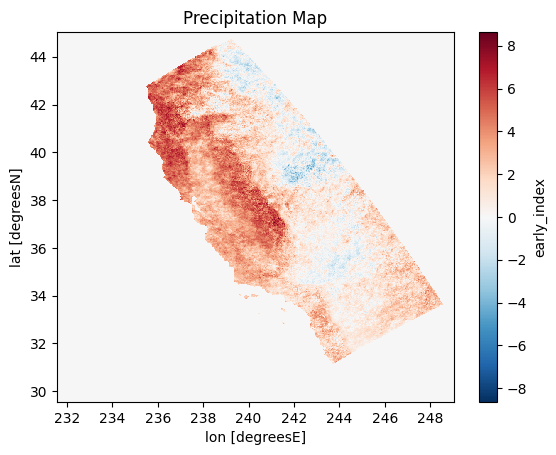

In [119]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01A-5_EXCESSzerodays_2015-2044_VWD_MPI.nc"  # Replace with your NetCDF file path
variable_to_map = "early_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

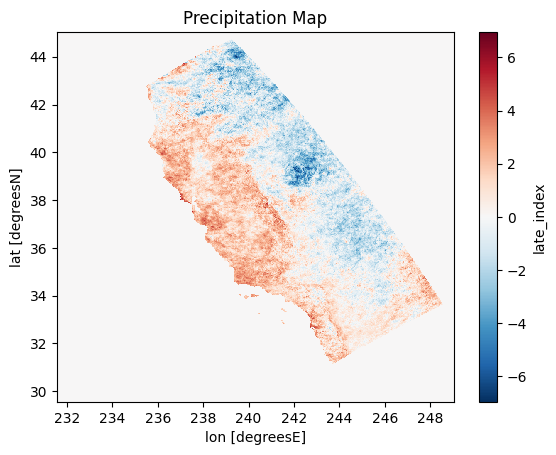

In [123]:
import xarray as xr
import matplotlib.pyplot as plt

def load_and_map_netcdf(file_path, variable_name='pr', title='Mapped Data'):
    """
    Loads a NetCDF file, maps a specified variable, and displays the plot.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to map (default: 'pr').
        title (str): Title for the plot.
    """
    try:
        ds = xr.open_dataset(file_path)
        if variable_name not in ds:
            print(f"Error: Variable '{variable_name}' not found in the NetCDF file.")
            return

        data_to_plot = ds[variable_name]

        # Check for latitude and longitude dimensions
        if 'lat' in data_to_plot.dims and 'lon' in data_to_plot.dims:
            data_to_plot.plot() #xarray handles the mapping automatically.
            plt.title(title)
            plt.show()
        else:
            print("Error: The variable does not have 'lat' and 'lon' dimensions, so mapping is not possible.")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
file_path = "VCP_DROUGHT_OCTMAR_01B-5_EXCESSzerodays_2045-2074_VWD_MPI.nc"  # Replace with your NetCDF file path
variable_to_map = "late_index"  # Replace with the variable you want to map
plot_title = "Precipitation Map"

load_and_map_netcdf(file_path, variable_to_map, plot_title)

In [125]:
import xarray as xr
import glob # For finding files, or you can list them manually
import os

# --- Configuration ---

# 1. Specify the path to your NetCDF files
# Option A: Use a wildcard pattern if your files are in the same directory
file_pattern = "VCP_DROUGHT_OCTMAR_01A*.nc" # IMPORTANT: Change this to your actual path and pattern
netcdf_files = sorted(glob.glob(file_pattern))

# Option B: Manually list the file paths
# netcdf_files = [
#     "/path/to/your/files/file1.nc",
#     "/path/to/your/files/file2.nc",
#     "/path/to/your/files/file3.nc",
#     "/path/to/your/files/file4.nc",
#     "/path/to/your/files/file5.nc",
# ] # IMPORTANT: Change these to your actual file paths

# Check if files were found (if using glob)
if not netcdf_files:
    print(f"No files found matching pattern: {file_pattern}")
    print("Or, if manually listing, ensure the list is not empty.")
    # exit() # Or handle as appropriate

print(f"Found files: {netcdf_files}")

# 2. Specify the name of the variable you want to average
# This variable must exist in all your NetCDF files.
variable_name = "early_index"  # IMPORTANT: Change this (e.g., 'temperature', 'precipitation')

# 3. Specify the name of the dimension that the files will be concatenated along.
# If your files have a coordinate like 'time' and these times are different,
# xarray might automatically use that. If they are just 5 distinct files
# for the same grid without a distinguishing coordinate, open_mfdataset
# will create a new dimension, often 'concat_dim'.
# We will explicitly tell it to concatenate along a new dimension called 'file_dim'.
# This makes the averaging step clearer.
concatenation_dim = "file_index"

# 4. Specify the output file path
output_filename = "VCP_DROUGHT_OCTMAR_01A_ExcessDryDays_GENUSE-AVE_2015-2044.nc" # IMPORTANT: Change this
output_directory = os.path.dirname(output_filename)
if not os.path.exists(output_directory) and output_directory:
    os.makedirs(output_directory)
    print(f"Created output directory: {output_directory}")

# --- Processing ---

try:
    # 1. Load multiple NetCDF files
    # open_mfdataset can automatically combine files along a new or existing dimension.
    # We provide the list of files and tell it to concatenate them along our specified dimension.
    # We also pass preprocess if we want to ensure a consistent structure or select variables.
    def preprocess_for_mfdataset(ds):
        # Example: Select only the variable of interest to save memory,
        # or ensure the concatenation dimension doesn't already exist with a conflicting meaning.
        if variable_name not in ds.variables:
            raise ValueError(f"Variable '{variable_name}' not found in one of the files.")
        return ds[[variable_name]] # Keep only the target variable

    # If your files already have a 'time' dimension and you want to average over time:
    # ds_combined = xr.open_mfdataset(netcdf_files, combine='by_coords', parallel=True)
    # And then you would average over 'time':
    # averaged_data = ds_combined[variable_name].mean(dim='time')

    # For averaging across files where each file is a separate entity for the same grid:
    # We'll load them and concatenate them along a new dimension.
    list_of_datasets = [xr.open_dataset(f) for f in netcdf_files]

    # Check if all datasets have the required variable
    for i, ds_single in enumerate(list_of_datasets):
        if variable_name not in ds_single.variables:
            raise ValueError(f"Variable '{variable_name}' not found in file: {netcdf_files[i]}")

    # Concatenate along the new dimension
    ds_combined = xr.concat(list_of_datasets, dim=concatenation_dim)
    print("\nCombined dataset structure:")
    print(ds_combined)

    # 2. Calculate the average for each xy (lat/lon) location
    # The mean is calculated along the dimension that represents the different files.
    # If using open_mfdataset without a common coordinate like 'time', it often
    # creates a 'concat_dim'. If we used concat explicitly, it's 'file_index'.
    if variable_name in ds_combined:
        averaged_data_array = ds_combined[variable_name].mean(dim=concatenation_dim)
        print(f"\nCalculated average along dimension: '{concatenation_dim}'")
        print("\nAveraged data array structure:")
        print(averaged_data_array)
    else:
        raise ValueError(f"Variable '{variable_name}' not found in the combined dataset. Available variables: {list(ds_combined.data_vars)}")


    # 3. Prepare the dataset for export
    # The result of .mean() is a DataArray. We'll put it into a Dataset.
    # It's good practice to give the averaged variable a descriptive name
    # and copy relevant attributes.
    output_ds = xr.Dataset({f"{variable_name}_mean": averaged_data_array})

    # You might want to copy global attributes from one of the original files
    if list_of_datasets:
        output_ds.attrs = list_of_datasets[0].attrs
        output_ds.attrs['history'] = (
            f"Averaged from {len(netcdf_files)} files. "
            f"Original files pattern: {file_pattern if 'file_pattern' in locals() else 'manual list'}. "
            f"Averaged variable: {variable_name}."
        )
    if hasattr(averaged_data_array, 'attrs'):
        output_ds[f"{variable_name}_mean"].attrs = averaged_data_array.attrs
        output_ds[f"{variable_name}_mean"].attrs['long_name'] = f"Average of {averaged_data_array.attrs.get('long_name', variable_name)}"
        output_ds[f"{variable_name}_mean"].attrs['units'] = averaged_data_array.attrs.get('units', 'unknown')


    # Ensure latitude and longitude coordinates are preserved correctly.
    # If 'lat' and 'lon' were dimensions in the original files, they should be in averaged_data_array.
    # Example: if your coordinate names are different, adjust here.
    # output_ds = output_ds.rename({'latitude': 'lat', 'longitude': 'lon'}) # If needed

    print("\nOutput dataset structure:")
    print(output_ds)

    # 4. Export the file as NetCDF
    output_ds.to_netcdf(output_filename)
    print(f"\nSuccessfully saved averaged data to: {output_filename}")

except FileNotFoundError:
    print(f"Error: One or more input files not found. Please check paths: {netcdf_files}")
except ValueError as ve:
    print(f"ValueError: {ve}")
except KeyError as ke:
    print(f"KeyError: Likely an issue with variable or dimension names. {ke}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Found files: ['VCP_DROUGHT_OCTMAR_01A-1_EXCESSzerodays_2015-2044_VWD_ACCESS.nc', 'VCP_DROUGHT_OCTMAR_01A-2_EXCESSzerodays_2015-2044_VWD_Earth3.nc', 'VCP_DROUGHT_OCTMAR_01A-3_EXCESSzerodays_2015-2044_VWD_FGOALS.nc', 'VCP_DROUGHT_OCTMAR_01A-4_EXCESSzerodays_2015-2044_VWD_MIROC.nc', 'VCP_DROUGHT_OCTMAR_01A-5_EXCESSzerodays_2015-2044_VWD_MPI.nc']

Combined dataset structure:
<xarray.Dataset> Size: 11MB
Dimensions:      (file_index: 5, lat: 495, lon: 559)
Coordinates:
  * lat          (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon          (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
Dimensions without coordinates: file_index
Data variables:
    early_index  (file_index, lat, lon) float64 11MB 0.0 0.0 0.0 ... 0.0 0.0 0.0

Calculated average along dimension: 'file_index'

Averaged data array structure:
<xarray.DataArray 'early_index' (lat: 495, lon: 559)> Size: 2MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [

In [127]:
import xarray as xr
import glob # For finding files, or you can list them manually
import os

# --- Configuration ---

# 1. Specify the path to your NetCDF files
# Option A: Use a wildcard pattern if your files are in the same directory
file_pattern = "VCP_DROUGHT_OCTMAR_01B*.nc" # IMPORTANT: Change this to your actual path and pattern
netcdf_files = sorted(glob.glob(file_pattern))

# Option B: Manually list the file paths
# netcdf_files = [
#     "/path/to/your/files/file1.nc",
#     "/path/to/your/files/file2.nc",
#     "/path/to/your/files/file3.nc",
#     "/path/to/your/files/file4.nc",
#     "/path/to/your/files/file5.nc",
# ] # IMPORTANT: Change these to your actual file paths

# Check if files were found (if using glob)
if not netcdf_files:
    print(f"No files found matching pattern: {file_pattern}")
    print("Or, if manually listing, ensure the list is not empty.")
    # exit() # Or handle as appropriate

print(f"Found files: {netcdf_files}")

# 2. Specify the name of the variable you want to average
# This variable must exist in all your NetCDF files.
variable_name = "late_index"  # IMPORTANT: Change this (e.g., 'temperature', 'precipitation')

# 3. Specify the name of the dimension that the files will be concatenated along.
# If your files have a coordinate like 'time' and these times are different,
# xarray might automatically use that. If they are just 5 distinct files
# for the same grid without a distinguishing coordinate, open_mfdataset
# will create a new dimension, often 'concat_dim'.
# We will explicitly tell it to concatenate along a new dimension called 'file_dim'.
# This makes the averaging step clearer.
concatenation_dim = "file_index"

# 4. Specify the output file path
output_filename = "VCP_DROUGHT_OCTMAR_01B_ExcessDryDays_GENUSE-AVE_2045-2074.nc" # IMPORTANT: Change this
output_directory = os.path.dirname(output_filename)
if not os.path.exists(output_directory) and output_directory:
    os.makedirs(output_directory)
    print(f"Created output directory: {output_directory}")

# --- Processing ---

try:
    # 1. Load multiple NetCDF files
    # open_mfdataset can automatically combine files along a new or existing dimension.
    # We provide the list of files and tell it to concatenate them along our specified dimension.
    # We also pass preprocess if we want to ensure a consistent structure or select variables.
    def preprocess_for_mfdataset(ds):
        # Example: Select only the variable of interest to save memory,
        # or ensure the concatenation dimension doesn't already exist with a conflicting meaning.
        if variable_name not in ds.variables:
            raise ValueError(f"Variable '{variable_name}' not found in one of the files.")
        return ds[[variable_name]] # Keep only the target variable

    # If your files already have a 'time' dimension and you want to average over time:
    # ds_combined = xr.open_mfdataset(netcdf_files, combine='by_coords', parallel=True)
    # And then you would average over 'time':
    # averaged_data = ds_combined[variable_name].mean(dim='time')

    # For averaging across files where each file is a separate entity for the same grid:
    # We'll load them and concatenate them along a new dimension.
    list_of_datasets = [xr.open_dataset(f) for f in netcdf_files]

    # Check if all datasets have the required variable
    for i, ds_single in enumerate(list_of_datasets):
        if variable_name not in ds_single.variables:
            raise ValueError(f"Variable '{variable_name}' not found in file: {netcdf_files[i]}")

    # Concatenate along the new dimension
    ds_combined = xr.concat(list_of_datasets, dim=concatenation_dim)
    print("\nCombined dataset structure:")
    print(ds_combined)

    # 2. Calculate the average for each xy (lat/lon) location
    # The mean is calculated along the dimension that represents the different files.
    # If using open_mfdataset without a common coordinate like 'time', it often
    # creates a 'concat_dim'. If we used concat explicitly, it's 'file_index'.
    if variable_name in ds_combined:
        averaged_data_array = ds_combined[variable_name].mean(dim=concatenation_dim)
        print(f"\nCalculated average along dimension: '{concatenation_dim}'")
        print("\nAveraged data array structure:")
        print(averaged_data_array)
    else:
        raise ValueError(f"Variable '{variable_name}' not found in the combined dataset. Available variables: {list(ds_combined.data_vars)}")


    # 3. Prepare the dataset for export
    # The result of .mean() is a DataArray. We'll put it into a Dataset.
    # It's good practice to give the averaged variable a descriptive name
    # and copy relevant attributes.
    output_ds = xr.Dataset({f"{variable_name}_mean": averaged_data_array})

    # You might want to copy global attributes from one of the original files
    if list_of_datasets:
        output_ds.attrs = list_of_datasets[0].attrs
        output_ds.attrs['history'] = (
            f"Averaged from {len(netcdf_files)} files. "
            f"Original files pattern: {file_pattern if 'file_pattern' in locals() else 'manual list'}. "
            f"Averaged variable: {variable_name}."
        )
    if hasattr(averaged_data_array, 'attrs'):
        output_ds[f"{variable_name}_mean"].attrs = averaged_data_array.attrs
        output_ds[f"{variable_name}_mean"].attrs['long_name'] = f"Average of {averaged_data_array.attrs.get('long_name', variable_name)}"
        output_ds[f"{variable_name}_mean"].attrs['units'] = averaged_data_array.attrs.get('units', 'unknown')


    # Ensure latitude and longitude coordinates are preserved correctly.
    # If 'lat' and 'lon' were dimensions in the original files, they should be in averaged_data_array.
    # Example: if your coordinate names are different, adjust here.
    # output_ds = output_ds.rename({'latitude': 'lat', 'longitude': 'lon'}) # If needed

    print("\nOutput dataset structure:")
    print(output_ds)

    # 4. Export the file as NetCDF
    output_ds.to_netcdf(output_filename)
    print(f"\nSuccessfully saved averaged data to: {output_filename}")

except FileNotFoundError:
    print(f"Error: One or more input files not found. Please check paths: {netcdf_files}")
except ValueError as ve:
    print(f"ValueError: {ve}")
except KeyError as ke:
    print(f"KeyError: Likely an issue with variable or dimension names. {ke}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Found files: ['VCP_DROUGHT_OCTMAR_01B-1_EXCESSzerodays_2045-2074_VWD_ACCESS.nc', 'VCP_DROUGHT_OCTMAR_01B-2_EXCESSzerodays_2045-2074_VWD_Earth3.nc', 'VCP_DROUGHT_OCTMAR_01B-3_EXCESSzerodays_2045-2074_VWD_FGOALS.nc', 'VCP_DROUGHT_OCTMAR_01B-4_EXCESSzerodays_2045-2074_VWD_MIROC.nc', 'VCP_DROUGHT_OCTMAR_01B-5_EXCESSzerodays_2045-2074_VWD_MPI.nc']

Combined dataset structure:
<xarray.Dataset> Size: 11MB
Dimensions:     (file_index: 5, lat: 495, lon: 559)
Coordinates:
  * lat         (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon         (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
Dimensions without coordinates: file_index
Data variables:
    late_index  (file_index, lat, lon) float64 11MB 0.0 0.0 0.0 ... 0.0 0.0 0.0

Calculated average along dimension: 'file_index'

Averaged data array structure:
<xarray.DataArray 'late_index' (lat: 495, lon: 559)> Size: 2MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0

In [129]:
import xarray as xr
import numpy as np
import rioxarray  # Import rioxarray for GeoTIFF export
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

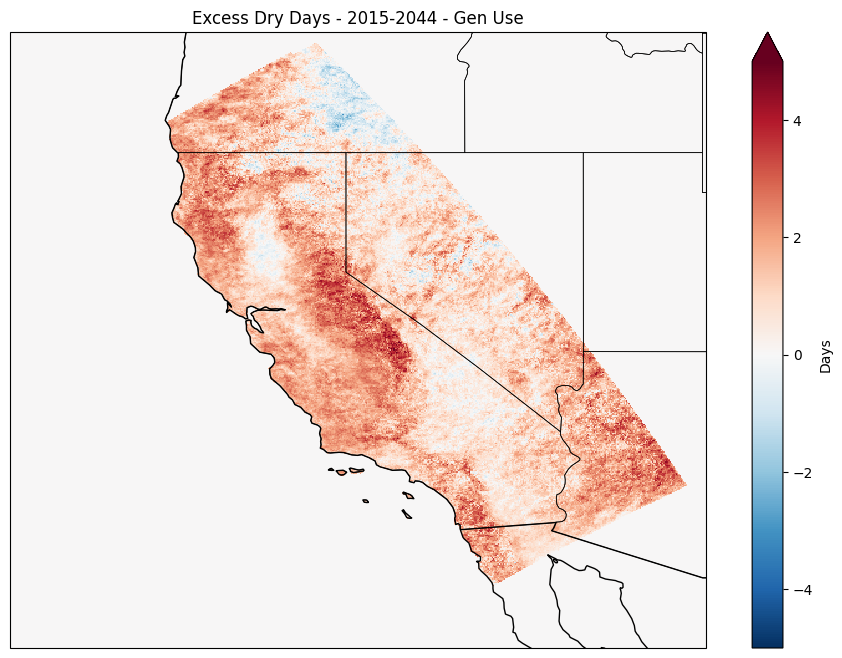

In [149]:
def map_99(netcdf_file, variable_name="early_index_mean", projection=ccrs.PlateCarree(), cmap='RdBu_r'):
    """
    Creates a map of the 99th Percentile for PR (1950-2014) from a NetCDF file.

    Args:
        netcdf_file (str): Path to the NetCDF file containing the pr values.
        variable_name (str): Name of the variable to plot. Defaults to "pr".
        projection (cartopy.crs.Projection): Cartopy projection to use. Defaults to PlateCarree.
        cmap (str): Colormap to use. Defaults to 'RdBu_r'.
    """
    try:
        ds = xr.open_dataset(netcdf_file)
        data = ds[variable_name]

        if 'lat' not in data.coords or 'lon' not in data.coords:
            print("Error: Latitude and longitude coordinates not found.")
            ds.close()
            return

        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=projection)

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.STATES, linewidth=0.5)

        data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, vmax=5,cbar_kwargs={'label': 'Days'})

        plt.title("Excess Dry Days - 2015-2044 - Gen Use")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {netcdf_file}")
    except KeyError:
        print(f"Error: Variable '{variable_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if 'ds' in locals():
            ds.close()

# Example usage (assuming you have the tasmax_diff.nc file from the previous code):
netcdf_file_path = "VCP_DROUGHT_OCTMAR_01A_ExcessDryDays_GENUSE-AVE_2015-2044.nc"  # Path to the NetCDF file with the tasmax difference

map_99(netcdf_file_path)

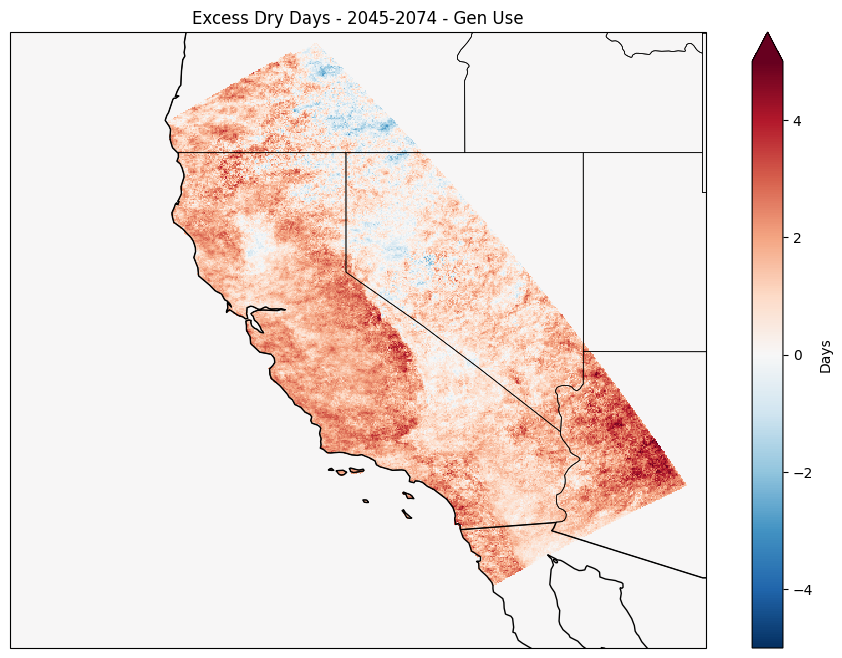

In [151]:
def map_99(netcdf_file, variable_name="late_index_mean", projection=ccrs.PlateCarree(), cmap='RdBu_r'):
    """
    Creates a map of the 99th Percentile for PR (1950-2014) from a NetCDF file.

    Args:
        netcdf_file (str): Path to the NetCDF file containing the pr values.
        variable_name (str): Name of the variable to plot. Defaults to "pr".
        projection (cartopy.crs.Projection): Cartopy projection to use. Defaults to PlateCarree.
        cmap (str): Colormap to use. Defaults to 'RdBu_r'.
    """
    try:
        ds = xr.open_dataset(netcdf_file)
        data = ds[variable_name]

        if 'lat' not in data.coords or 'lon' not in data.coords:
            print("Error: Latitude and longitude coordinates not found.")
            ds.close()
            return

        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=projection)

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.STATES, linewidth=0.5)

        data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, vmax=5,cbar_kwargs={'label': 'Days'})

        plt.title("Excess Dry Days - 2045-2074 - Gen Use")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {netcdf_file}")
    except KeyError:
        print(f"Error: Variable '{variable_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if 'ds' in locals():
            ds.close()

# Example usage (assuming you have the tasmax_diff.nc file from the previous code):
netcdf_file_path = "VCP_DROUGHT_OCTMAR_01B_ExcessDryDays_GENUSE-AVE_2045-2074.nc"  # Path to the NetCDF file with the tasmax difference

map_99(netcdf_file_path)

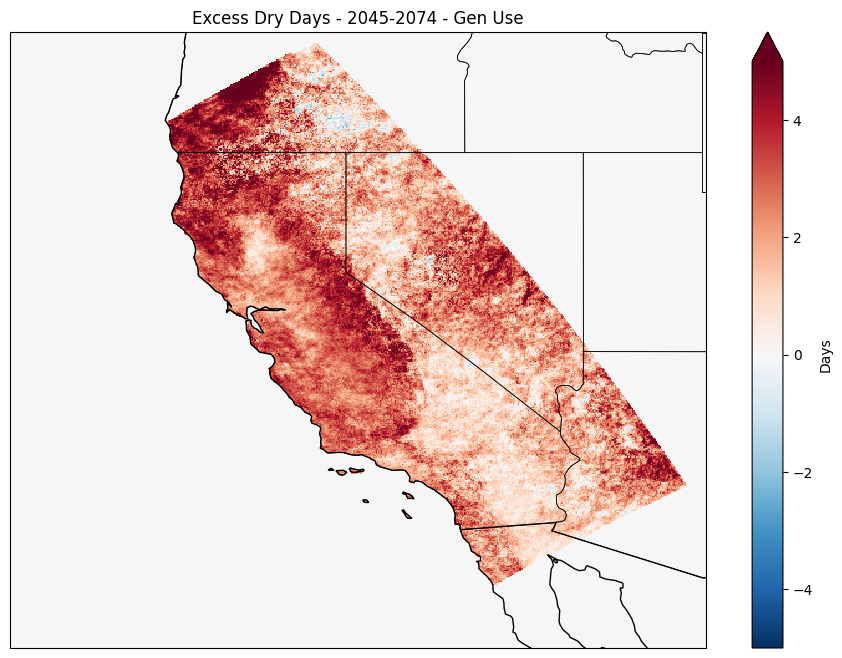

In [162]:
def map_99(netcdf_file, variable_name="late_index_mean", projection=ccrs.PlateCarree(), cmap='RdBu_r'):
    """
    Creates a map of the 99th Percentile for PR (1950-2014) from a NetCDF file.

    Args:
        netcdf_file (str): Path to the NetCDF file containing the pr values.
        variable_name (str): Name of the variable to plot. Defaults to "pr".
        projection (cartopy.crs.Projection): Cartopy projection to use. Defaults to PlateCarree.
        cmap (str): Colormap to use. Defaults to 'RdBu_r'.
    """
    try:
        ds = xr.open_dataset(netcdf_file)
        data = ds[variable_name]

        if 'lat' not in data.coords or 'lon' not in data.coords:
            print("Error: Latitude and longitude coordinates not found.")
            ds.close()
            return

        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=projection)

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.STATES, linewidth=0.5)

        data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, vmax=5,cbar_kwargs={'label': 'Days'})

        plt.title("Excess Dry Days - 2045-2074 - Gen Use")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {netcdf_file}")
    except KeyError:
        print(f"Error: Variable '{variable_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if 'ds' in locals():
            ds.close()

# Example usage (assuming you have the tasmax_diff.nc file from the previous code):
netcdf_file_path = "VCP_DROUGHT_01B_ExcessDryDays_GENUSE-AVE_2045-2074.nc"  # Path to the NetCDF file with the tasmax difference

map_99(netcdf_file_path)

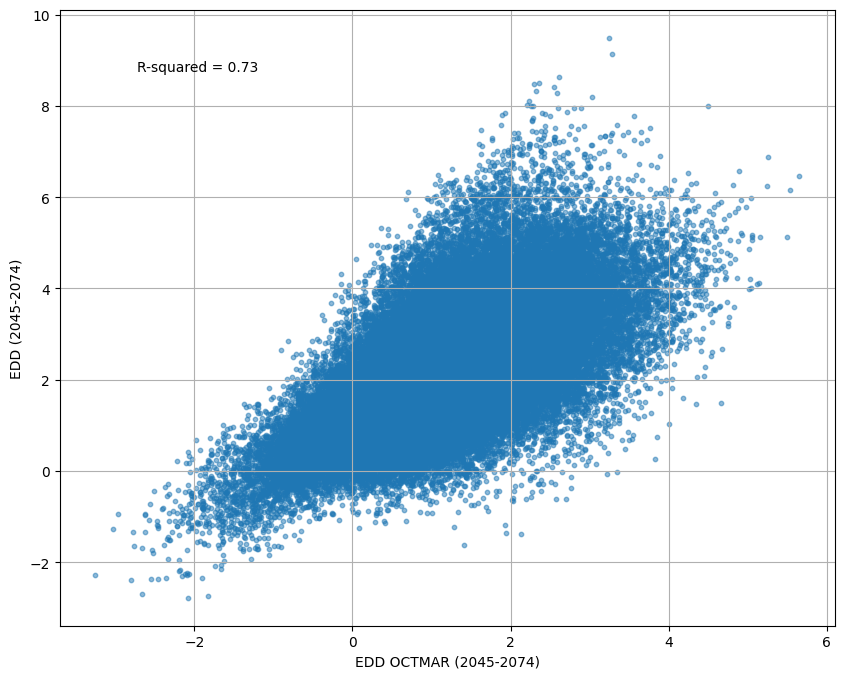

In [166]:
from scipy import stats

def scatter_tasmax_diff_vs_exceedance(diff_file, exceedance_file, output_plot="scatter_diff_exceedance.png"):
    """
    Creates a scatter plot between tasmax_diff.nc and 03B_tasmax3day_sandwiched_exceedance_counts_2045-2074.nc,
    including the R-squared value.

    Args:
        diff_file (str): Path to the tasmax_diff.nc file.
        exceedance_file (str): Path to the 03B_tasmax3day_sandwiched_exceedance_counts_2045-2074.nc file.
        output_plot (str): Path to save the scatter plot image.
    """
    try:
        diff_ds = xr.open_dataset(diff_file)
        exceedance_ds = xr.open_dataset(exceedance_file)

        diff_data = diff_ds["late_index_mean"]  # Or whatever your variable name is
        exceedance_data = exceedance_ds["late_index_mean"]  # Or your variable name

        # Ensure dimensions are compatible by flattening
        diff_values = diff_data.values.flatten()
        exceedance_values = exceedance_data.values.flatten()

        # Calculate R-squared
        slope, intercept, r_value, p_value, std_err = stats.linregress(diff_values, exceedance_values)
        r_squared = r_value**2

        plt.figure(figsize=(10, 8))
        plt.scatter(diff_values, exceedance_values, s=10, alpha=0.5)

        plt.xlabel("EDD OCTMAR (2045-2074)")
        plt.ylabel("EDD (2045-2074)")
        #plt.title("Scatter Plot: tasmax Difference vs. Exceedance Counts")
        plt.grid(True)

        # Add R-squared to the plot
        plt.text(0.1, 0.9, f"R-squared = {r_squared:.2f}", transform=plt.gca().transAxes)

        plt.savefig(output_plot)
        plt.show()

    except FileNotFoundError:
        print("Error: One or both files not found.")
    except KeyError:
        print("Error: Required variables not found in one or both files.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if 'diff_ds' in locals():
            diff_ds.close()
        if 'exceedance_ds' in locals():
            exceedance_ds.close()

# Example usage:
diff_file_path = "VCP_DROUGHT_OCTMAR_01B_ExcessDryDays_GENUSE-AVE_2045-2074.nc"  # Replace with your tasmax_diff.nc file path
exceedance_file_path = "VCP_DROUGHT_01B_ExcessDryDays_GENUSE-AVE_2045-2074.nc"  # Replace with your exceedance file path

scatter_tasmax_diff_vs_exceedance(diff_file_path, exceedance_file_path)


--- Running Example 2: xarray ---

xarray Dataset structure:
<xarray.Dataset> Size: 2MB
Dimensions:           (lat: 495, lon: 559)
Coordinates:
  * lat               (lat) float32 2kB 29.58 29.61 29.64 ... 44.95 44.98 45.02
  * lon               (lon) float32 2kB 231.6 231.6 231.6 ... 249.0 249.0 249.0
Data variables:
    early_index_mean  (lat, lon) float64 2MB ...
Attributes:
    history:  Averaged from 5 files. Original files pattern: VCP_DROUGHT_OCTM...


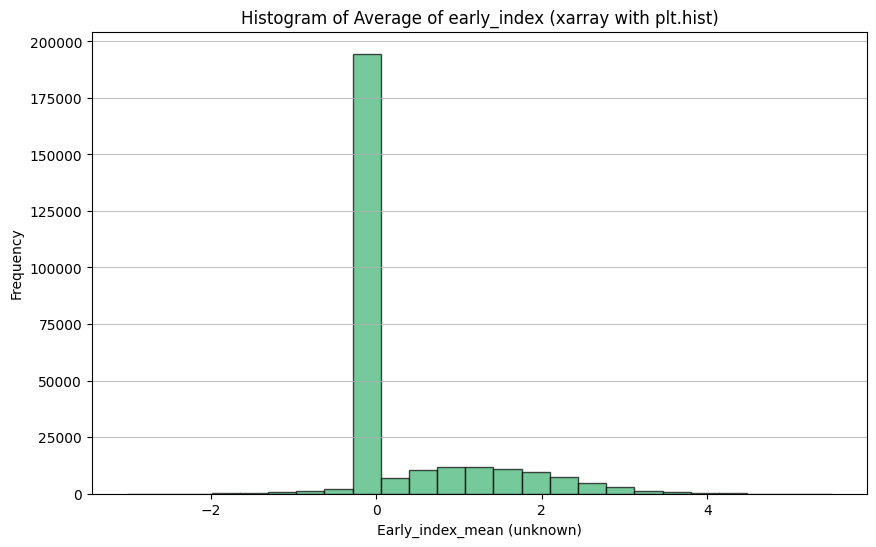

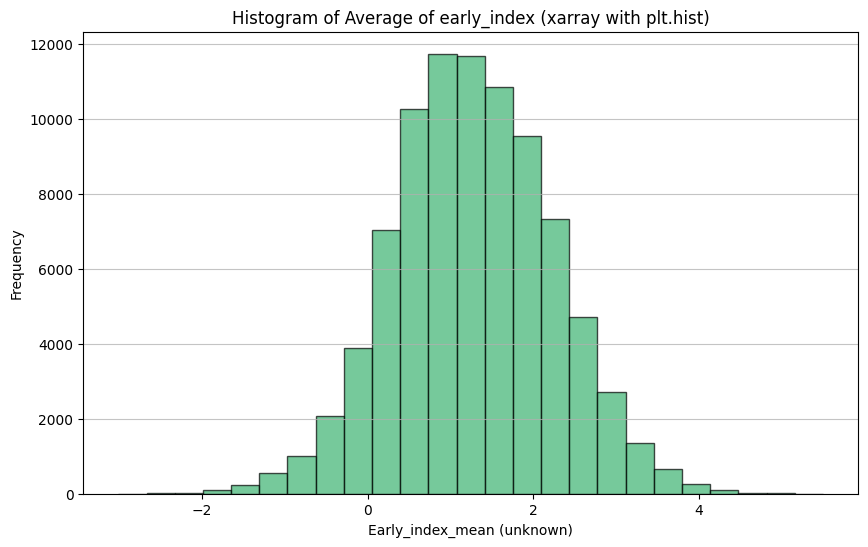

In [135]:
try:
    import xarray as xr
    XARRAY_AVAILABLE = True
except ImportError:
    XARRAY_AVAILABLE = False
    print("xarray library not found. Please install it (e.g., pip install xarray).")
    print("Skipping xarray example.")
# --- Example 2: Using xarray and Matplotlib (or xarray's plotting) ---
if XARRAY_AVAILABLE:
    print("\n--- Running Example 2: xarray ---")
    netcdf_filepath = 'VCP_DROUGHT_OCTMAR_01A_ExcessDryDays_GENUSE-AVE_2015-2044.nc'
    variable_to_plot_xr = 'early_index_mean' # Change this to your variable name

    try:
        # 1. Load the NetCDF file using xarray
        # xarray automatically handles closing the file when 'ds' goes out of scope
        # or you can use a 'with' statement like with netCDF4.
        ds = xr.open_dataset(netcdf_filepath)

        # 2. Inspect the dataset (optional)
        print("\nxarray Dataset structure:")
        print(ds)

        # 3. Select the data variable
        if variable_to_plot_xr in ds:
            data_array = ds[variable_to_plot_xr] 
            # Alternative: Using matplotlib directly with xarray data
            # This gives more control if needed, similar to the netCDF4 example
            plt.figure(figsize=(10, 6))
            # .values flattens and converts to a NumPy array
            plt.hist(data_array.values.flatten(), bins=25, color='mediumseagreen', edgecolor='black', alpha=0.7)
            plt.title(f'Histogram of {data_array.attrs.get("long_name", variable_to_plot_xr)} (xarray with plt.hist)')
            plt.xlabel(f'{variable_to_plot_xr.capitalize()} ({data_array.attrs.get("units", "")})')
            plt.ylabel('Frequency')
            plt.grid(axis='y', alpha=0.75)
            plt.show()

        else:
            print(f"Variable '{variable_to_plot_xr}' not found in the xarray Dataset.")
        
        # 3. Select the data variable
        if variable_to_plot_xr in ds:
            data_array = ds[variable_to_plot_xr] 
            data_array = data_array.where(data_array != 0)
            # Alternative: Using matplotlib directly with xarray data
            # This gives more control if needed, similar to the netCDF4 example
            plt.figure(figsize=(10, 6))
            # .values flattens and converts to a NumPy array
            plt.hist(data_array.values.flatten(), bins=25, color='mediumseagreen', edgecolor='black', alpha=0.7)
            plt.title(f'Histogram of {data_array.attrs.get("long_name", variable_to_plot_xr)} (xarray with plt.hist)')
            plt.xlabel(f'{variable_to_plot_xr.capitalize()} ({data_array.attrs.get("units", "")})')
            plt.ylabel('Frequency')
            plt.grid(axis='y', alpha=0.75)
            plt.show()

        else:
            print(f"Variable '{variable_to_plot_xr}' not found in the xarray Dataset.")
        
        # Close the dataset explicitly if not using a 'with' statement
        # (though for simple scripts, Python's garbage collection often handles it)
        ds.close()

    except FileNotFoundError:
        print(f"Error: NetCDF file not found at '{netcdf_filepath}'")
    except Exception as e:
        print(f"An error occurred with xarray: {e}")
else:
    if not XARRAY_AVAILABLE:
        print("Skipping xarray example as the library is not installed.")
    elif not dummy_nc_file:
        print("Skipping xarray example as dummy file could not be created.")



--- Running Example 2: xarray ---

xarray Dataset structure:
<xarray.Dataset> Size: 2MB
Dimensions:          (lat: 495, lon: 559)
Coordinates:
  * lat              (lat) float32 2kB 29.58 29.61 29.64 ... 44.95 44.98 45.02
  * lon              (lon) float32 2kB 231.6 231.6 231.6 ... 249.0 249.0 249.0
Data variables:
    late_index_mean  (lat, lon) float64 2MB ...
Attributes:
    history:  Averaged from 5 files. Original files pattern: VCP_DROUGHT_OCTM...


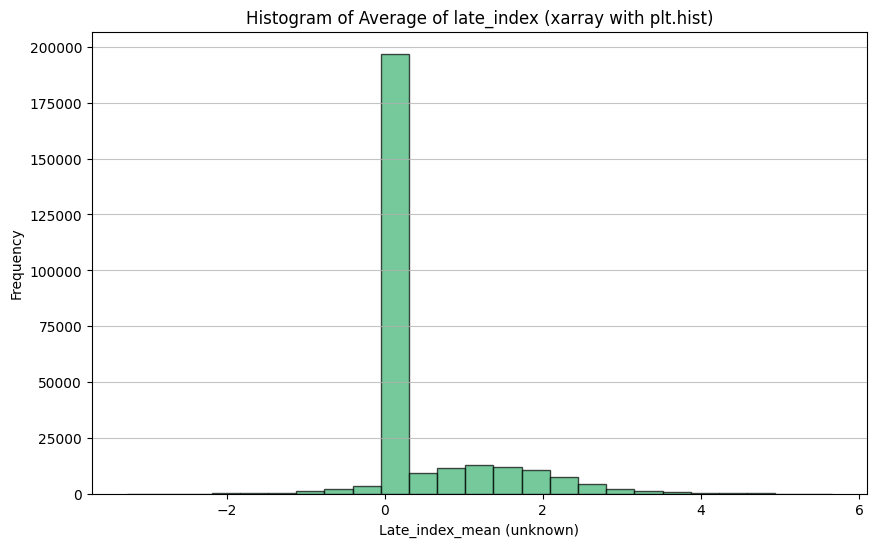

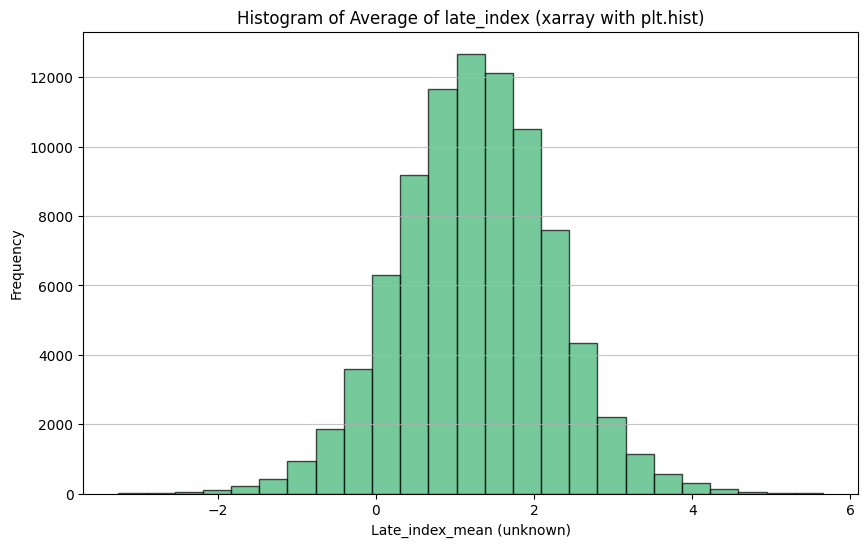

In [139]:
try:
    import xarray as xr
    XARRAY_AVAILABLE = True
except ImportError:
    XARRAY_AVAILABLE = False
    print("xarray library not found. Please install it (e.g., pip install xarray).")
    print("Skipping xarray example.")
# --- Example 2: Using xarray and Matplotlib (or xarray's plotting) ---
if XARRAY_AVAILABLE:
    print("\n--- Running Example 2: xarray ---")
    netcdf_filepath = 'VCP_DROUGHT_OCTMAR_01B_ExcessDryDays_GENUSE-AVE_2045-2074.nc'
    variable_to_plot_xr = 'late_index_mean' # Change this to your variable name

    try:
        # 1. Load the NetCDF file using xarray
        # xarray automatically handles closing the file when 'ds' goes out of scope
        # or you can use a 'with' statement like with netCDF4.
        ds = xr.open_dataset(netcdf_filepath)

        # 2. Inspect the dataset (optional)
        print("\nxarray Dataset structure:")
        print(ds)

        # 3. Select the data variable
        if variable_to_plot_xr in ds:
            data_array = ds[variable_to_plot_xr] 
            # Alternative: Using matplotlib directly with xarray data
            # This gives more control if needed, similar to the netCDF4 example
            plt.figure(figsize=(10, 6))
            # .values flattens and converts to a NumPy array
            plt.hist(data_array.values.flatten(), bins=25, color='mediumseagreen', edgecolor='black', alpha=0.7)
            plt.title(f'Histogram of {data_array.attrs.get("long_name", variable_to_plot_xr)} (xarray with plt.hist)')
            plt.xlabel(f'{variable_to_plot_xr.capitalize()} ({data_array.attrs.get("units", "")})')
            plt.ylabel('Frequency')
            plt.grid(axis='y', alpha=0.75)
            plt.show()

        else:
            print(f"Variable '{variable_to_plot_xr}' not found in the xarray Dataset.")
        
        # 3. Select the data variable
        if variable_to_plot_xr in ds:
            data_array = ds[variable_to_plot_xr] 
            data_array = data_array.where(data_array != 0)
            # Alternative: Using matplotlib directly with xarray data
            # This gives more control if needed, similar to the netCDF4 example
            plt.figure(figsize=(10, 6))
            # .values flattens and converts to a NumPy array
            plt.hist(data_array.values.flatten(), bins=25, color='mediumseagreen', edgecolor='black', alpha=0.7)
            plt.title(f'Histogram of {data_array.attrs.get("long_name", variable_to_plot_xr)} (xarray with plt.hist)')
            plt.xlabel(f'{variable_to_plot_xr.capitalize()} ({data_array.attrs.get("units", "")})')
            plt.ylabel('Frequency')
            plt.grid(axis='y', alpha=0.75)
            plt.show()

        else:
            print(f"Variable '{variable_to_plot_xr}' not found in the xarray Dataset.")
        
        # Close the dataset explicitly if not using a 'with' statement
        # (though for simple scripts, Python's garbage collection often handles it)
        ds.close()

    except FileNotFoundError:
        print(f"Error: NetCDF file not found at '{netcdf_filepath}'")
    except Exception as e:
        print(f"An error occurred with xarray: {e}")
else:
    if not XARRAY_AVAILABLE:
        print("Skipping xarray example as the library is not installed.")
    elif not dummy_nc_file:
        print("Skipping xarray example as dummy file could not be created.")
